# Predicting Cuphead Bosses from Keystroke Data

## 1. The Dataset: Keystroke Recording from Cuphead Boss Fights

The foundation of this project is a personal dataset of keystroke telemetry generated during gameplay of the video game *Cuphead*. The primary goal is to determine if a machine learning model can classify which boss is being fought based solely on the patterns and timing of the player's keyboard inputs. The dataset is a personal digital archive collected for this specific analysis.

### What is Included in the Data?

The dataset consists of a collection of individual boss fight sessions (September 23 - *******fill this out*******). Each session represents one attempt, from the start of the fight to its conclusion (a win or a loss), against one of four specific bosses:

*   Cagney Carnation
*   Grim Matchstick
*   Baroness Von Bon Bon
*   Glumstone the Giant

For each session, the following data points are captured:
1.  **Metadata:** The boss being fought, the player's equipment loadout (weapon + special skills), the game difficulty, and a precise UTC timestamp for when the recording started.
2.  **Event Stream:** A sequence of every relevant keystroke (`keydown` and `keyup` events). Each event includes the specific key pressed and a timestamp in milliseconds ($t_{ms}$) from the start of the fight.
3.  **Summary:** The final outcome of the fight (`win` or `lose`) and the total duration in milliseconds.

The data is structured in a **JSON Lines (`JSONL`)** format, where each line in a file is a distinct JSON object. This format is ideal for streaming event data, as it allows for events to be written incrementally without needing to parse and rewrite an entire file.

A sample from a single fight log file (`2025-09-23T13-52-06Z_26962.jsonl`) illustrates this structure:

```json
{"fight_id": "2025-09-23T13-52-06Z_26962", "meta": {"boss": "Cagney Carnation", "loadout": "Peashooter + Smoke Bomb", "difficulty": "Regular", "start_utc": "2025-09-23T13-52-06.960065+00:00"}}
{"fight_id": "2025-09-23T13-52-06Z_26962", "event": "keydown", "key": "f", "t_ms": 1476}
{"fight_id": "2025-09-23T13-52-06Z_26962", "event": "keydown", "key": "Key.space", "t_ms": 4038}
{"fight_id": "2025-09-23T13-52-06Z_26962", "event": "keyup", "key": "Key.space", "t_ms": 4054}
{"fight_id": "2025-09-23T13-52-06Z_26962", "summary": {"outcome": "win", "duration_ms": 74788, "end_utc": "2025-09-23T13:53:21.751994+00:00"}}
```

### How the Data Was Obtained and Sampled

The data was collected using a custom-built application, the **"Cuphead Boss Keystroke Logger"**. This Python application, utilizing the `Tkinter` library for the UI and `pynput` for global keyboard listening, was developed specifically for this project. The full source code for the logger is available for review at [**Your GitHub Link Here**].

The collection process involved playing the game normally while the logger ran in the background. Global hotkeys (e.g., `F1` to start, `F9` to mark a win) allowed for precise start and end points for data capture without interrupting gameplay. The dataset represents a **convenience sample** of my gameplay over several days, covering numerous attempts against the four target bosses.

#### Design Choices and Data Quality Assurance

The data collection tool evolved significantly to improve data quality and minimize human error. This iterative process was crucial for building a reliable dataset.


*Figure 1: The evolution of the data logger UI, from a basic tool to a more robust and informative interface for quality assurance.*

1.  **Initial Prototype:** The first version of the logger was minimalistic, with simple buttons and hotkeys. However, it provided no immediate feedback, making it difficult to spot erroneous recordings—such as forgetting to press "Start" until the fight was nearly over.

2.  **Introducing Feedback for Quality Control:** To address this, a "Recent Sessions" panel was added. This view immediately displayed the outcome, duration, and event count of the last five fights. This feature was instrumental in identifying "bad data" at a glance. For instance, a fight logged with a duration of $t < 10$ seconds and a very low event count was clearly an error. Any such anomalous entries were immediately selected and deleted, ensuring they did not contaminate the final dataset.

3.  **Real-time Telemetry:** During initial testing, it became apparent that some keys were not being registered correctly by the listener. To validate the data stream in real time, the UI was updated to show the live elapsed time, total event count, and the most recent key action. This provided immediate confirmation that the logger was functioning as expected.

4.  **Final UI for Reduced Error:** The final design uses strong visual cues to prevent common mistakes. The "Start" button becomes a large, red "STOP RECORDING" button during a session, making the application's state unambiguous. Key telemetry like elapsed time and current keystrokes are given prominence. This user-centric design greatly increased the reliability of the collected data.

After the collection phase, a final cleaning step was performed. All fight logs with a duration of less than 10 seconds were programmatically removed from the dataset, as these were deemed to be collection errors rather than legitimate gameplay attempts. This process of rigorous, tool-assisted data collection and cleaning ensures that the resulting dataset is a valid and accurate representation of my gameplay patterns.

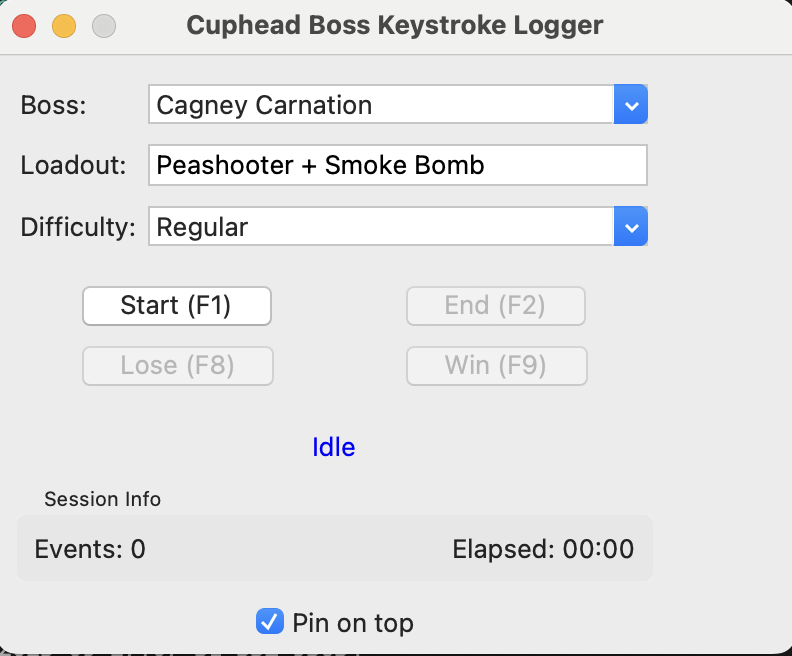

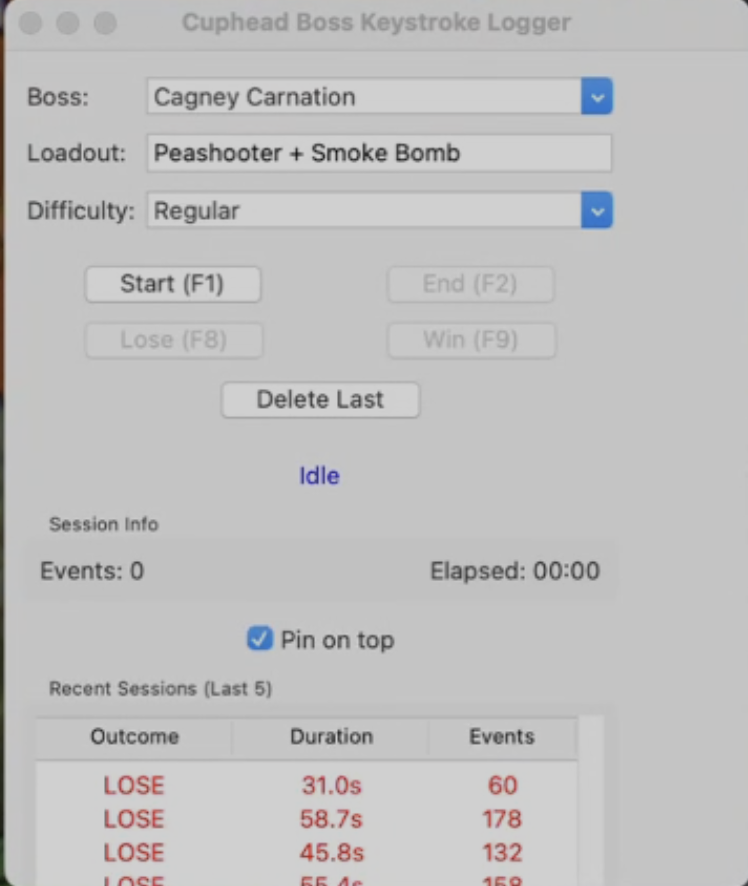

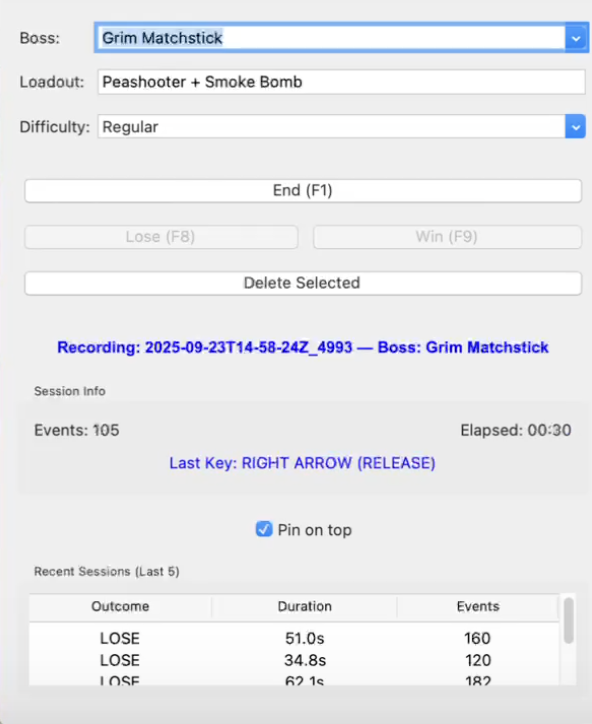

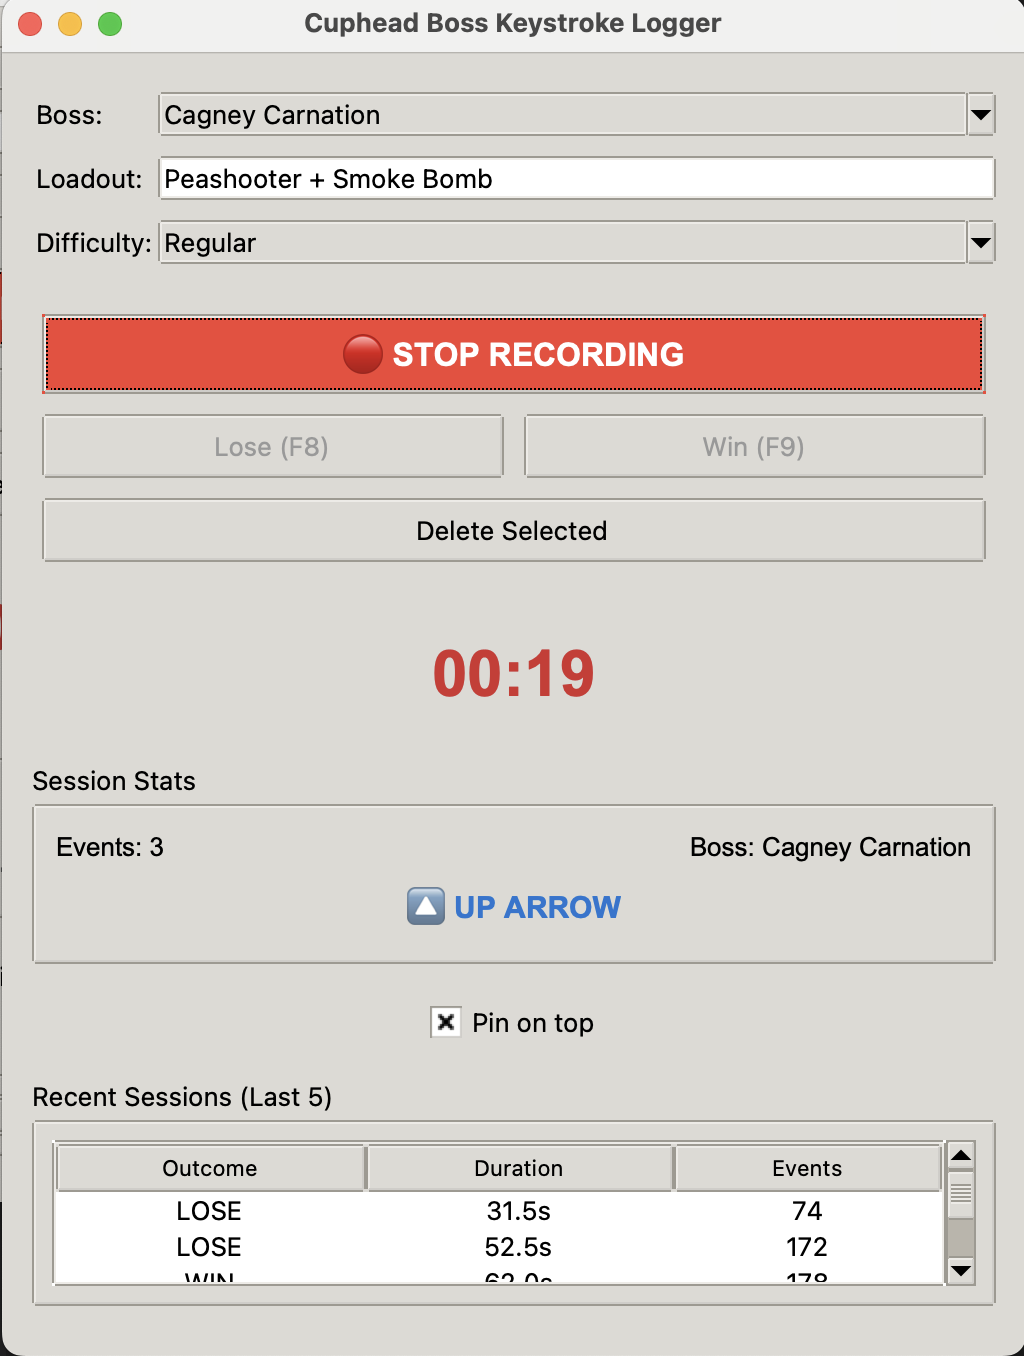